In [35]:
#getting csv files
import pandas as pd

chunk_mse_300_08_df = pd.read_csv('300_0.80_-BQwNszotto_ChunkMSE.csv')
chunk_mse_300_085_df = pd.read_csv('300_0.85_-BQwNszotto_ChunkMSE.csv')
chunk_mse_300_09_df = pd.read_csv('300_0.90_-BQwNszotto_ChunkMSE.csv')
chunk_mse_300_095_df = pd.read_csv('300_0.95_-BQwNszotto_ChunkMSE.csv')
chunk_mse_500_098_df = pd.read_csv('500_0.98_-BQwNszotto_ChunkMSE.csv')
chunk_mse_500_099_df = pd.read_csv('500_0.99_-BQwNszotto_ChunkMSE.csv')
chunk_mse_500_0993_df = pd.read_csv('500_0.993_-BQwNszotto_ChunkMSE.csv')

#add ["ChunkId","MSE"] for columns
chunk_mse_300_08_df.columns = ["ChunkId","MSE"]
chunk_mse_300_085_df.columns = ["ChunkId","MSE"]
chunk_mse_300_09_df.columns = ["ChunkId","MSE"]
chunk_mse_300_095_df.columns = ["ChunkId","MSE"]
chunk_mse_500_098_df.columns = ["ChunkId","MSE"]
chunk_mse_500_099_df.columns = ["ChunkId","MSE"]
chunk_mse_500_0993_df.columns = ["ChunkId","MSE"]

#ensure all values are not 0
chunk_mse_300_08_df =  chunk_mse_300_08_df[chunk_mse_300_08_df['MSE'] != 0]
chunk_mse_300_085_df = chunk_mse_300_085_df[chunk_mse_300_085_df['MSE'] != 0]
chunk_mse_300_09_df =  chunk_mse_300_09_df[chunk_mse_300_09_df['MSE'] != 0]
chunk_mse_300_095_df = chunk_mse_300_095_df[chunk_mse_300_095_df['MSE'] != 0]
chunk_mse_500_098_df = chunk_mse_500_098_df[chunk_mse_500_098_df['MSE'] != 0]
chunk_mse_500_099_df = chunk_mse_500_099_df[chunk_mse_500_099_df['MSE'] != 0]
chunk_mse_500_0993_df = chunk_mse_500_0993_df[chunk_mse_500_0993_df['MSE'] != 0]

chunk_mse_300_095_df.head()


,ChunkId,MSE
0,0,0.210647
1,1,0.202988
2,2,0.210559
3,3,0.215977
4,4,0.211654


Looking at the distribution of the chunks' MSE loss for sample size of 300 and a mask ratio of 0.8

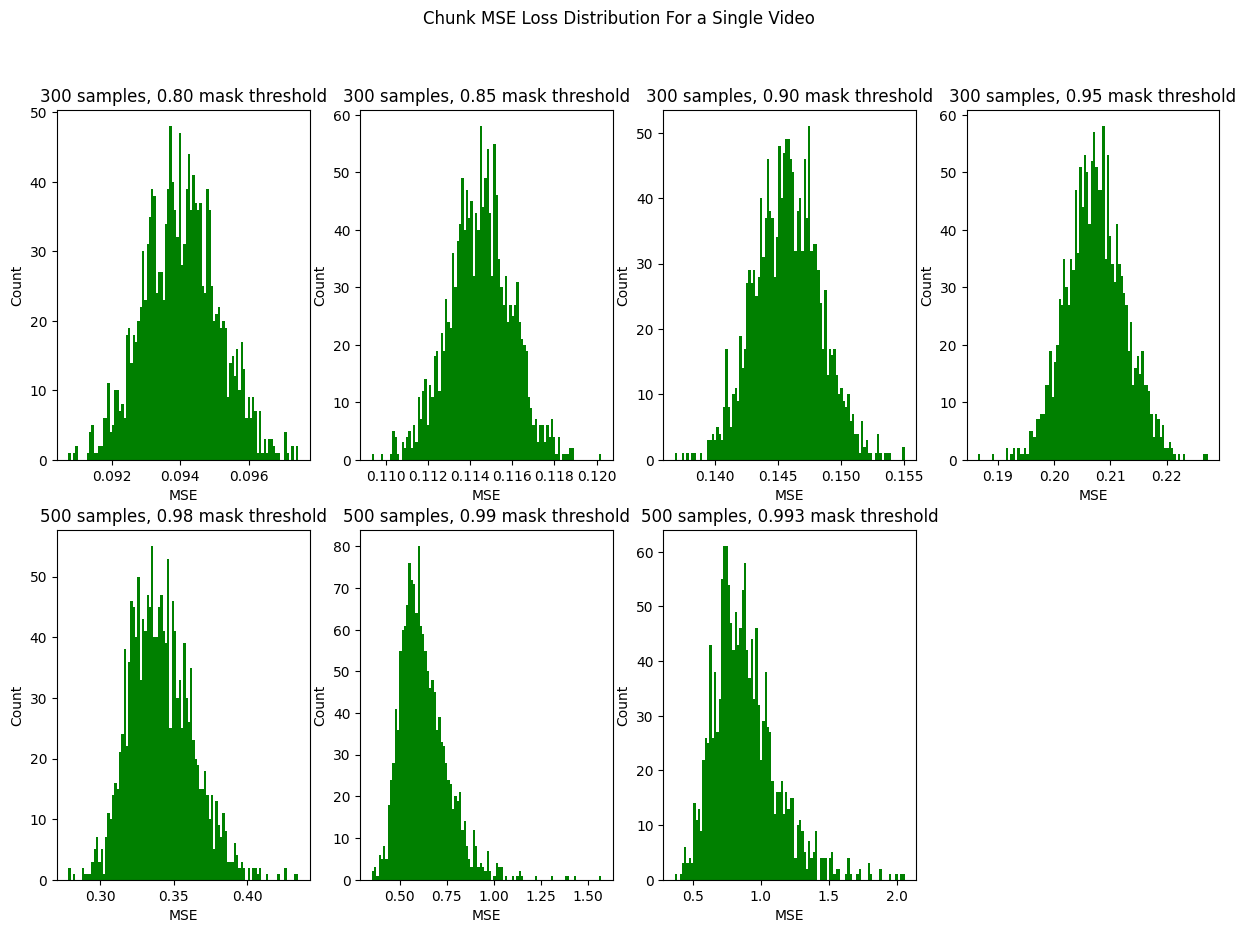

In [38]:
#Looking at the distribution of the chunks' MSE loss for each one
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Chunk MSE Loss Distribution For a Single Video')

axs[0, 0].hist(chunk_mse_300_08_df['MSE'], bins=100, color='green')
axs[0, 0].set_title('300 samples, 0.80 mask threshold')

axs[0, 1].hist(chunk_mse_300_085_df['MSE'], bins=100, color = 'green')
axs[0, 1].set_title('300 samples, 0.85 mask threshold')

axs[0, 2].hist(chunk_mse_300_09_df['MSE'], bins=100, color = 'green')
axs[0, 2].set_title('300 samples, 0.90 mask threshold')

axs[0, 3].hist(chunk_mse_300_095_df['MSE'], bins=100, color = 'green')
axs[0, 3].set_title('300 samples, 0.95 mask threshold')

axs[1, 0].hist(chunk_mse_500_098_df['MSE'], bins=100, color = 'green')
axs[1, 0].set_title('500 samples, 0.98 mask threshold')

axs[1, 1].hist(chunk_mse_500_099_df['MSE'], bins=100, color = 'green')
axs[1, 1].set_title('500 samples, 0.99 mask threshold')

axs[1, 2].hist(chunk_mse_500_0993_df['MSE'], bins=100, color = 'green')
axs[1, 2].set_title('500 samples, 0.993 mask threshold')

#make last axis invisible
axs[1, 3].axis('off')

for ax in axs.flat:
    ax.set(xlabel='MSE', ylabel='Count')

#Download this plot as an image
plt.savefig('plot_ChunkMSE.png')

plt.show()


ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

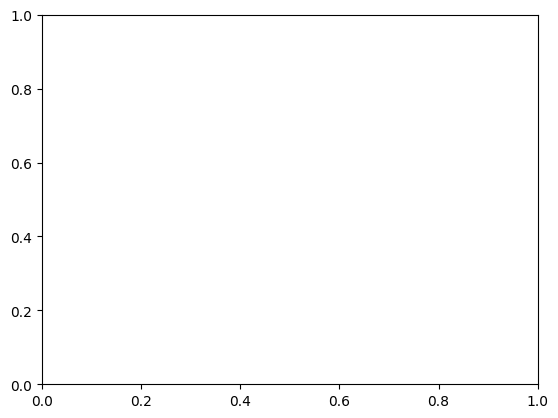

In [39]:
#Plotting the average MSE loss for each dataset with respect to the mask threshold
import numpy as np

#average MSE loss for each dataset
avg_mse_300_08 = np.mean(chunk_mse_300_08_df['MSE'])
avg_mse_300_085 = np.mean(chunk_mse_300_085_df['MSE'])
avg_mse_300_09 = np.mean(chunk_mse_300_09_df['MSE'])
avg_mse_300_095 = np.mean(chunk_mse_300_095_df['MSE'])
avg_mse_500_098 = np.mean(chunk_mse_500_098_df['MSE'])
avg_mse_500_099 = np.mean(chunk_mse_500_099_df['MSE'])
avg_mse_500_0993 = np.mean(chunk_mse_500_0993_df['MSE'])


#plotting the average MSE loss for each dataset with respect to the mask threshold
plt.plot([0.80, 0.85, 0.90, 0.95, 0.98, 0.99, 0.993], [avg_mse_300_08, avg_mse_300_085, avg_mse_300_09, avg_mse_300_095, avg_mse_500_098, avg_mse_500_099, avg_mse_500_0993], color='green')
#adding variance to the plot
plt.errorbar(
    [0.80, 0.85, 0.90, 0.95, 0.98, 0.99, 0.993], 
    [avg_mse_300_08, avg_mse_300_085, avg_mse_300_09, avg_mse_300_095, avg_mse_500_098, avg_mse_500_099, avg_mse_500_0993], 
    yerr=[np.std(chunk_mse_300_08_df['MSE'])
          ,np.std(chunk_mse_300_085_df['MSE']),
          np.std(chunk_mse_300_09_df['MSE']),
          np.std(chunk_mse_300_095_df['MSE']),
          np.std(chunk_mse_500_098_df['MSE']),
          np.std(chunk_mse_500_099_df['MSE']), 
        np.std(chunk_mse_500_0993_df['MSE'])], 
          color='blue', 
          fmt='*'
)

plt.title('Average MSE Loss For Each Dataset With Respect To The Mask Threshold')
